# Stroke Prediction 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"D:\ALL Projects\1ML\Stroke_prediction\stroke-data.csv")
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
## We don't need the id column for analysis
df.drop(['id'],axis=1,inplace=True)
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
# Checking for missing values
df.isnull().sum()


## BMI has some missing values, we will fill them with mean vales

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
## Filling missing values in BMI column with mean value
# df['bmi'].fillna(df['bmi'].mean(),inplace=True) ## old way
df['bmi'] = df['bmi'].fillna(df['bmi'].mean)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Categorical Columns && Check for unique value

In [8]:
## here are the categorical columns in the dataset
## gender, ever_married, work_type, Residence_type, smoking_status
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:

df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

## Countplot for all categorical column

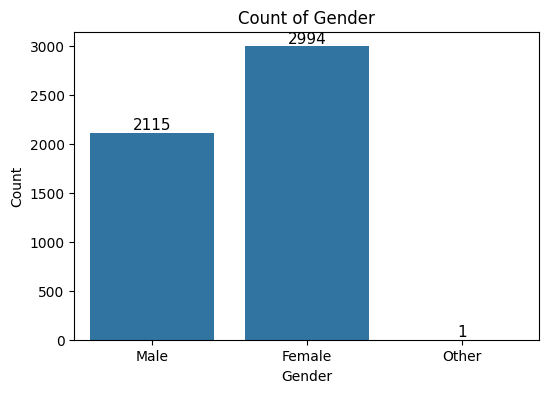

In [13]:

plt.figure(figsize=(6,4))
ax = sns.countplot(x = df['gender'])

# Add count numbers on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )

plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


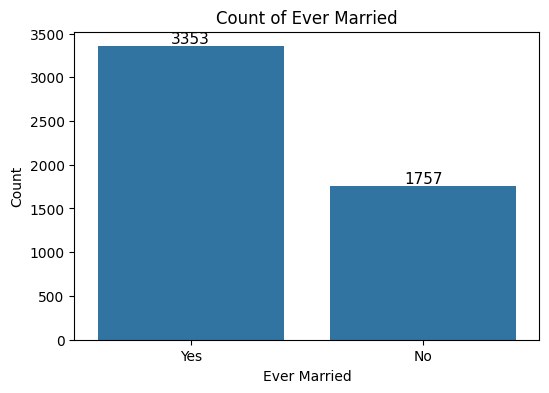

In [14]:


plt.figure(figsize=(6,4))
ax = sns.countplot(x = df['ever_married'])

# Add count numbers on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )

plt.title('Count of Ever Married')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.show()


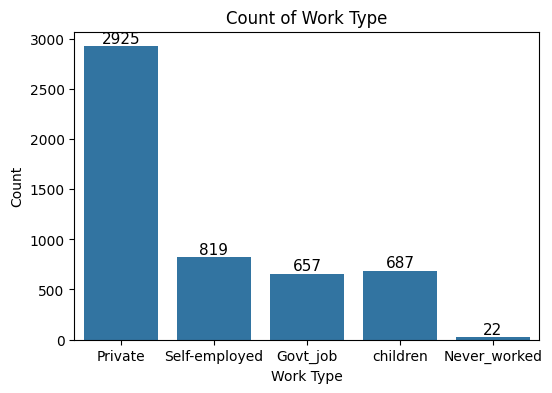

In [15]:


plt.figure(figsize=(6,4))
ax = sns.countplot(x = df['work_type'])

# Add count numbers on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )

plt.title('Count of Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()


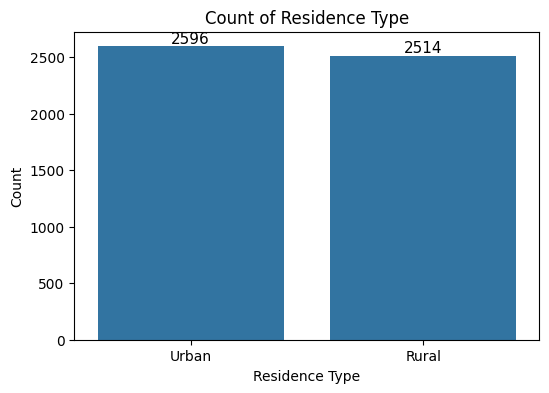

In [16]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['Residence_type'])

# Add count numbers on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )

plt.title('Count of Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()

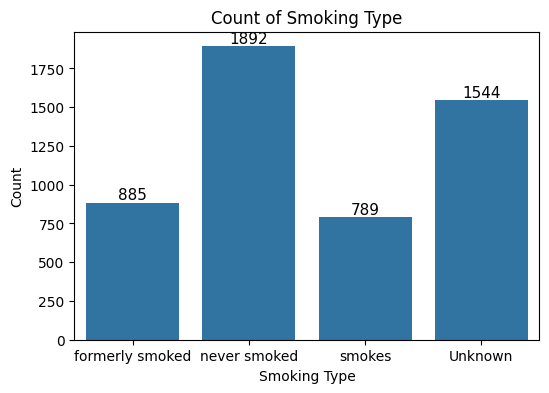

In [17]:



plt.figure(figsize=(6,4))
ax = sns.countplot(x = df['smoking_status'])

# Add count numbers on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )

plt.title('Count of Smoking Type')
plt.xlabel('Smoking Type')
plt.ylabel('Count')
plt.show()


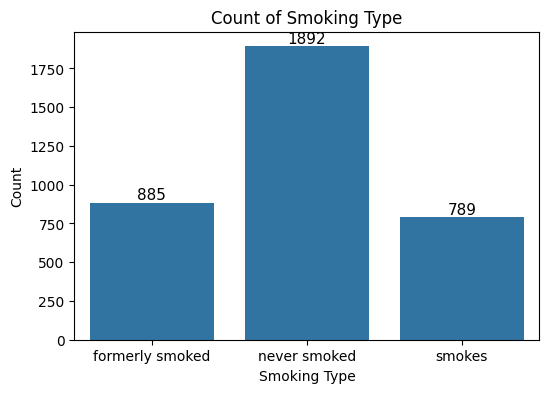

In [18]:

## Remove the unknown option............
df['smoking_status'].replace('Unknown', np.nan, inplace=True)


plt.figure(figsize=(6,4))
ax = sns.countplot(x = df['smoking_status'])

# Add count numbers on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )

plt.title('Count of Smoking Type')
plt.xlabel('Smoking Type')
plt.ylabel('Count')
plt.show()


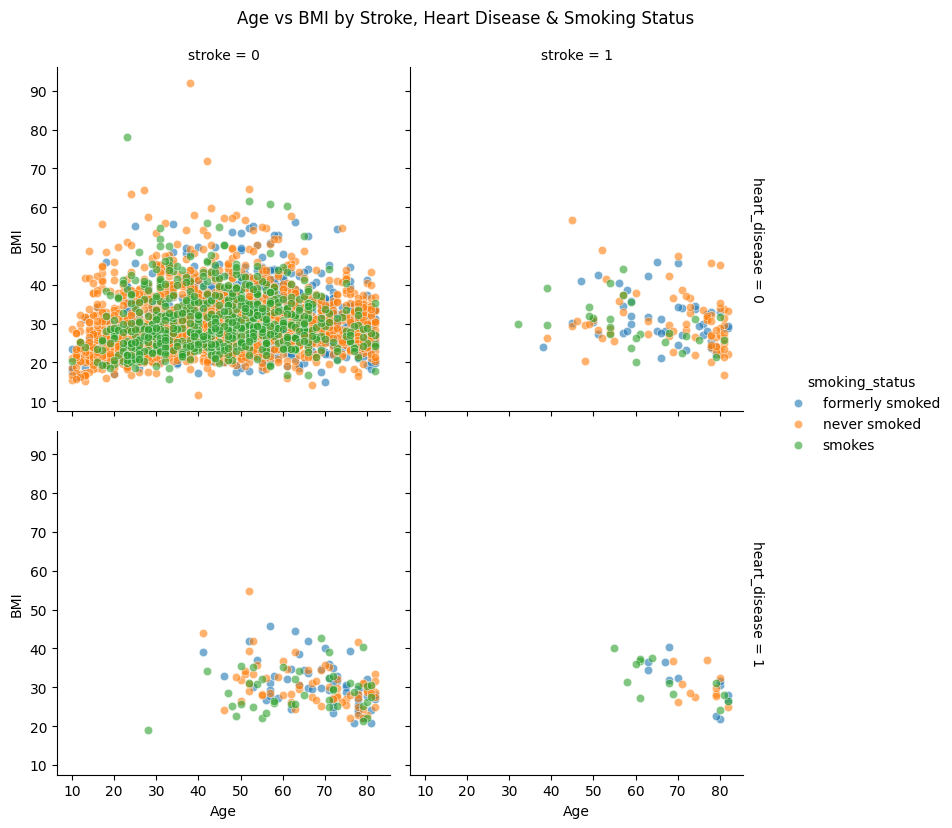

In [19]:


# Clean your data first (important)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df = df.dropna(subset=['age', 'bmi', 'stroke', 'heart_disease', 'smoking_status'])

# Create FacetGrid
fg = sns.FacetGrid(
    df,
    col='stroke',         # columns = stroke
    row='heart_disease',  # rows = heart disease
    hue='smoking_status', # color by smoking status
    height=4, 
    margin_titles=True
)

# Map scatterplot
fg.map(sns.scatterplot, 'age', 'bmi', alpha=0.6)

# Add legend and axis labels
fg.add_legend()
fg.set_axis_labels("Age", "BMI")
fg.fig.suptitle("Age vs BMI by Stroke, Heart Disease & Smoking Status", y=1.03)

plt.show()


# Label Encoding data

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

en_df= df.apply(le.fit_transform)
en_df.shape

(3426, 11)

In [21]:
## Input & Output 
X = en_df.drop(columns=['stroke'], axis=1)
Y = df['stroke']

In [22]:
X.shape, Y.shape

((3426, 10), (3426,))

# Split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2740, 10), (686, 10), (2740,), (686,))

# Standardize the data

In [24]:
## Data has different range ---> model will be biased
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.fit_transform(x_test)

# ML model


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:

sv = SVC(kernel='rbf', probability=True, random_state=2, class_weight='balanced')
sv.fit(x_train, y_train)
y_pred1 = sv.predict(x_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred1))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred1))


Accuracy: 0.7755102040816326
Confusion Matrix:
 [[510 132]
 [ 22  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       642
           1       0.14      0.50      0.22        44

    accuracy                           0.78       686
   macro avg       0.55      0.65      0.55       686
weighted avg       0.91      0.78      0.83       686



Precision & recall for class 1 are 0 → model never predicts the minority class.

Macro avg is low (~0.48) → overall poor balance.

Weighted avg looks okay (~0.90) because class 0 dominates, hiding the problem.